# Churn Prediction - Eduardo Chaves

## Pipeline (Data Preprocessing and Machine Learning Modeling)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib

sns.set_style("whitegrid")
# importando pacotes iniciais para o projeto

In [53]:
# importando o data set e visualizando-o
df = pd.read_csv('./assets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [54]:
df = df.drop(['customerID'], axis=1)
# removendo a coluna id que não será usada

In [55]:
df.duplicated().sum()
# verificar se há linhas duplicadas

22

In [56]:
df.info()
# visão geral dos dados e features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [57]:
df.TotalCharges.info()
# foi descoberto que a feature TotalCharges não está no tipo de dado apropriado

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


### Convertendo o tipo de dado da feature TotalCharges para o tipo correto (float)

In [58]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
# convertendo a feature totalcharges em float, e em caso de erros deixar o valor como nulo (errors='coerce')

In [59]:
df.TotalCharges.dtype
# vemos que agora está em float

dtype('float32')

In [60]:
df.TotalCharges.isnull().sum()
# vemos que foi detectado 11 valore nulos

11

In [61]:
df = df.dropna()
# removendo os valores nulos gerados quando foi
# trocado o tipo de dado de totalcharges

In [62]:
df.isnull().sum()
# verificando que não há mais valores nulos

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


### Categorical Encoding

Transformando os dados das features categóricas em números (Label Encoding) para melhor adequamento ao treinamento pelos modelos preditivos

Além disso será necessário alterar o tipo de dado das features categóricas para 'category', assim o modelo preditivo lidará com o mesmo de forma adequada

In [64]:
print(df.MultipleLines.unique())
print(df.OnlineSecurity.unique())
# verificando dados redundandtes (ex.: no phone service = no )
# identifiquei que esses dados redundandtes não ajudam no modelo preditivo, apenas trazendo mais
# complexidade no treinamento, predições e construção da dashboard com o stramlit, então por esses motivos decidi transformalos em 'não'

['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']


In [65]:
df = df.replace(('No phone service', 'No internet service'), 'No')

print(df.MultipleLines.unique())
print(df.OnlineSecurity.unique())
# removendo a redundancia

['No' 'Yes']
['No' 'Yes']


In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# importando a ferramenta label_encoder do scikitlean

In [67]:
df.info()
# verificando as features que precisam trocar o data type para category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [68]:
categorical_features = df.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)
categorical_features.info()
# definindo uma variável com as features que precisam ser trocadas, através da remoção das 3 únicas features que não serão modificadas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: int64(1), o

In [69]:
for feature in categorical_features.columns:
  df[feature] = label_encoder.fit_transform(df[feature])
  # transformando as diferentes categorias em 1,2,3...

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,1


### Teste de Correlação

<Axes: >

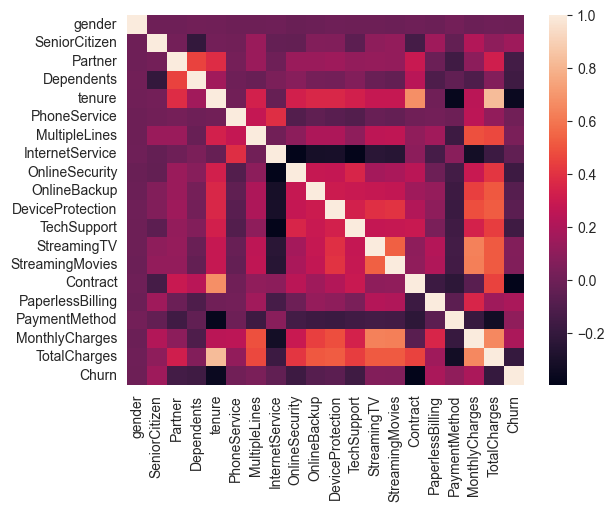

In [70]:
sns.heatmap(df.corr())

In [71]:
df = df.drop(['MonthlyCharges'], axis=1)
# removendo a coluna totalcharges que é basicamente monthlycharges * tenure
# conseguimos diminuir a correlação geral de nosso dataframe

<Axes: >

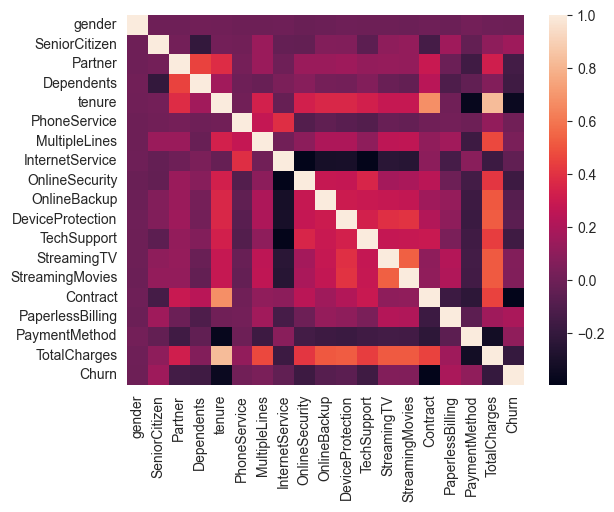

In [72]:
sns.heatmap(df.corr())

### Teste de Multicolinearidade

In [73]:
import statsmodels.api as sm

def calculate_vif(data):
  vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
  x_var_names = df.columns

  for i in range(0, x_var_names.shape[0]):
    y = df[x_var_names[i]]
    x = df[x_var_names.drop([x_var_names[i]])]
    r_squared = sm.OLS(y,x).fit().rsquared
    vif = round(1/(1-r_squared), 2)
    vif_df.loc[i] = [x_var_names[i], vif]

  return vif_df.sort_values(by = 'Vif', axis = 0, ascending = False, inplace = False)

# algorítimo que gera uma tabela exibindo as features com maior nível de colinearidade (vif)

In [74]:
calculate_vif(df).head()
# cheguei a remover as 3 maiores em três tentativas diferentes e a precisão não aumentou, então deixarei assim mesmo

,Var,Vif
4,tenure,14.32
17,TotalCharges,13.79
5,PhoneService,9.15
7,InternetService,4.38
14,Contract,3.96


### Trocando para o Tipo de Dado Categórico
Isso vai determinar para o modelo preditivo de que essas colunas são categóricas e não ordinais, ou seja, 1 não é menor que 2, mas apenas diferente

In [75]:
for feature in categorical_features.columns:
  df[feature] = df[feature].astype('category')
  # trocando o data type das features para 'category'

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

### Normalização das features contínuas (numéricas)

Dessa forma todas as features númericas estarão entre 0 e 1, porém com sua escala preservada

In [76]:
from sklearn.preprocessing import MinMaxScaler
import pickle

numeric_features = df.select_dtypes(np.number)

scalers_by_feature = [(feature, MinMaxScaler().fit(df[feature].values.reshape(-1,1))) for feature in numeric_features]

joblib.dump(scalers_by_feature, './assets/scalers_by_feature.jbl')

for feature_scaler in scalers_by_feature:
  feature, scaler = feature_scaler[0], feature_scaler[1]
  df[feature] = scaler.transform(df[feature].values.reshape(-1,1))

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.001275,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.215867,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.010310,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.015330,1


In [77]:
df.describe()
# podemos ver através do 'min' e 'max', que nossas features estão normalizadas (0~1)

,tenure,TotalCharges
count,7032.000000,7032.000000
mean,0.442560,0.261309
std,0.345708,0.261571
min,0.000000,0.000000
25%,0.112676,0.044155
50%,0.394366,0.159090
75%,0.760563,0.435719
max,1.000000,1.000000


### Separação entre Treino e Teste

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x = df.drop(['Churn'], axis=1)
y = df.Churn
# Separação dos dados das features da feature target

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
# separação entre treino e teste das features/classe target

In [81]:
print('x_train:', x_train.shape, '\nx_test:', x_test.shape)
# divisão de um terço dos dados para teste

x_train: (4711, 18) 
x_test: (2321, 18)


### Balanceamento das Features com a Classe Target

In [82]:
y_train.value_counts()
# exibindo o desbalanceamento atual

0    3452
1    1259
Name: Churn, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# será utilizado o balancemento da feature target através do método de over_sampling, usando do algorítimo smote onde será gerado dados artificiais

In [84]:
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()
# agora a classe está balanceada

0    3452
1    3452
Name: Churn, dtype: int64

In [85]:
print('x_train:', x_train.shape, '\nx_test:', x_test.shape)
# a diferença entre treino e teste agora é maior por conta do over sampling

x_train: (6904, 18) 
x_test: (2321, 18)


---
## 3. Criação e Avaliação dos Modelos Preditivos

### Criação

In [86]:
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score

In [87]:
model = lgbm.LGBMClassifier(seed=42, objective='binary')
# usando modelo 'light gradient-boosting machine' com o objetivo binário por se tratar de uma classificação binária (churn ou não churn)

In [88]:
cross_val_score(model, x_train, y_train, cv=5).mean()

0.8440143143489804

#### Grid Search
Logo abaixo está o código para uma busca por melhores hiperparâmetros através da técnica do Grid Search

`Eu pessoalmente decidi não usar essa técnica pois não trouxe um maior resultado comparado com o modelo acima sem a busca por hiperparâmetros (além de consumir muito tempo e recurso nesta tarefa), mas deixarei aqui abaixo o código comentado apenas como registro de meu aprendizdo neste meu primeiro projeto em Data Analytics & Machine Learning`

In [89]:
# grid = GridSearchCV(lgbm.LGBMClassifier(), {
#     'boosting_type': ['dart', 'gbdt'],
#     'num_iterations': [400, 500, 600, 700],
#     'learning_rate': [.1, .05],
#     'num_leaves': [70, 180],
#     'max_depth': [7, 8],
#     'seed': [42],
# }, cv=5)

# definindo o grid search a fim de buscar os melhores parâmetros para o modelo preditivo.
# Juntamente com o uso de cross-validation em 5 etapas para uma precisão geral, evitando overfitting

In [90]:
# grid.fit(x_train, y_train)
# realizando os treinamentos do grid search para descobrir os melhores parâmetros

In [91]:
# grid.best_score_ * 100
# maior precisão provinda do grid search

In [92]:
# best_parameters = grid.best_params_
# best_parameters
# melhores parâmetros captados pelo grid search

In [93]:
# model = lgbm.LGBMClassifier(
#   num_leaves = best_parameters['num_leaves'],
#   max_depth = best_parameters['max_depth'],
#   boosting_type = best_parameters['boosting_type'],
#   learning_rate = best_parameters['learning_rate'],
#   num_iterations = best_parameters['num_iterations'],
#   seed = 42,
#   objective = 'binary',
# )

# criando o modelo final com os melhores parâmetros captados pelo grid search

### Avaliação

In [94]:
from sklearn import metrics

In [95]:
model.fit(x_train, y_train)
# ajustando o modelo aos dados de treino

LGBMClassifier(objective='binary', seed=42)

In [96]:
y_predict = model.predict(x_test)
y_predict_proba = model.predict_proba(x_test)
# realizando a predição do modelo com os dados de teste

In [97]:
print(metrics.classification_report(y_test, y_predict))
# exibindo o resultado da predição

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1711
           1       0.59      0.61      0.60       610

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321



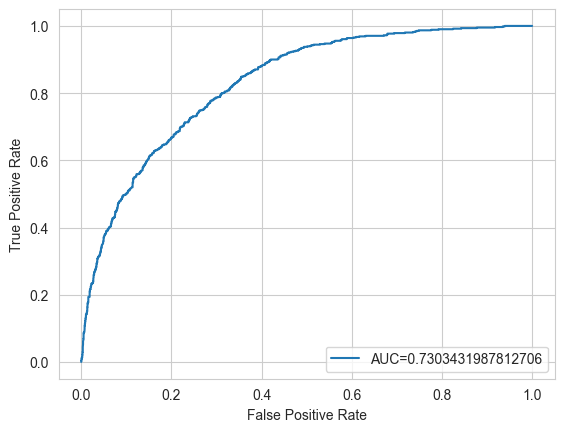

In [98]:
false_positive_roc, true_positive_roc, _ = metrics.roc_curve(y_test, y_predict_proba[:,1])
roc_auc_score = metrics.roc_auc_score(y_test, y_predict)

plt.plot(false_positive_roc,true_positive_roc,label="AUC="+str(roc_auc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# métrica de acurácia com a AUC ROC

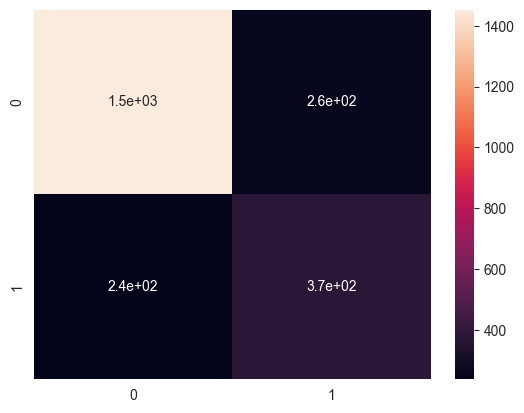

In [99]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)
plt.show()
# resultado da predição através da tabela matriz de confusão

### Compreendendo as features que mais impactam a classe target (Churn)

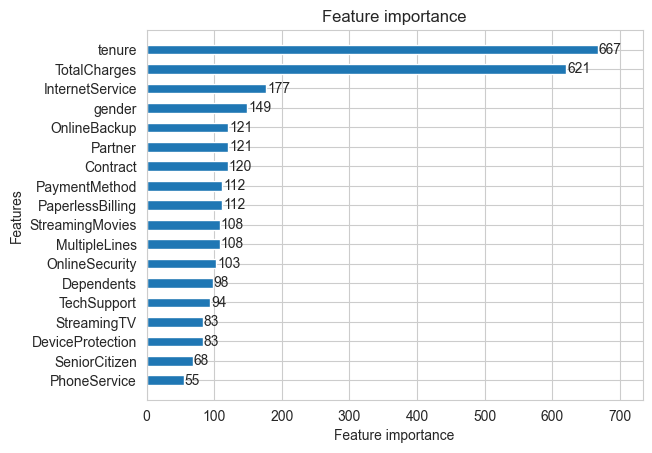

In [100]:
fig = lgbm.plot_importance(model, height=.5)
plt.show()

In [101]:
# fig = fig.figure
# fig.savefig('./assets/graphs/feature-importance.png', dpi=300, bbox_inches='tight')
# # salvando a figura em uma pasta a fim de axibí-la na dash do streamlit

### Salvando o modelo final em um arquivo a parte

In [102]:
# joblib.dump(model, './assets/churn-prediction-model.jbl')
# # salvando o modelo treinado em um arquivo a parte para usá-lo nas predições realizadas na dash do streamlit